In [ ]:
import pandas as pd

import numpy as np

In [ ]:
data=pd.read_csv('/content/stocks_quarterly.csv')

In [ ]:
data=data.dropna(subset=['grossProfit','operatingExpenses','ebit','netIncome_x','totalAssets'])

In [ ]:
data=data.drop(columns=['Stock_Performance','Nasdaq_Performance','nasd_ny_price','price','fiscalDateEnding','nasd_price',	'next_year_date',	'next_year_price','symbol','reportedDate'])

In [ ]:
cols_to_drop = data.isnull().mean().sort_values(ascending = False).head(45).index

In [ ]:
data.drop(columns = cols_to_drop, inplace = True)

In [ ]:
data=data.drop_duplicates()

In [ ]:
X=data.drop(columns='Label')

In [ ]:
y=data['Label']

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_validate


imputer = KNNImputer(n_neighbors=2)

imputed =imputer.fit_transform(X)


X = pd.DataFrame(imputed, columns=X.columns)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42,sampling_strategy=0.75)
X_res, y_res = rus.fit_resample(X, y)



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.33, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_tunned = RandomForestClassifier(bootstrap= True,
 max_depth= 70,
 max_features= 1,
 min_samples_leaf= 2,
 min_samples_split= 8,
 n_estimators= 200)


result_forest_tunned= cross_validate(forest_tunned, X_train, y_train, scoring = ["precision","accuracy","f1","recall","roc_auc"], cv=5)

accuracy_tunned=result_forest_tunned['test_accuracy'].mean()
precision_tunned=result_forest_tunned['test_precision'].mean()
recall_tunned=result_forest_tunned['test_recall'].mean()
f1_tunned=result_forest_tunned['test_f1'].mean()
roc_tunned=result_forest_tunned['test_roc_auc'].mean()


result_forest_tunned

{'fit_time': array([0.96268249, 0.9713037 , 0.96422267, 0.96433258, 1.25229216]),
 'score_time': array([0.10299873, 0.10081363, 0.10315418, 0.17672539, 0.10182309]),
 'test_accuracy': array([0.64615385, 0.66587678, 0.62677725, 0.64691943, 0.63981043]),
 'test_f1': array([0.52614897, 0.52684564, 0.48105437, 0.50662252, 0.51746032]),
 'test_precision': array([0.62641509, 0.6826087 , 0.60580913, 0.64285714, 0.61742424]),
 'test_recall': array([0.45355191, 0.42896175, 0.3989071 , 0.41803279, 0.44535519]),
 'test_roc_auc': array([0.7103597 , 0.71830487, 0.66853579, 0.70063104, 0.66849007])}

In [ ]:
forest_tunned.fit(X_train,y_train)

RandomForestClassifier(max_depth=70, max_features=1, min_samples_leaf=2,
                       min_samples_split=8, n_estimators=200)

In [ ]:
import pickle

Pkl_Filename = "Pickle_RL_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(forest_tunned, file)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(estimator = RandomForestClassifier(bootstrap= True,
                                                                                           max_depth= 70,
                                                                                           max_features= 1,
                                                                                           min_samples_leaf= 1,
                                                                                           min_samples_split= 8,
                                                                                           n_estimators= 200),
                                                                                           X = X_train, 
                                                                                           y = y_train, 
                                                                                           train_sizes = [250,500,1000,1500,2000,2500,2700], cv = 5,
                                                                                            scoring='precision'
                                                                                            )

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

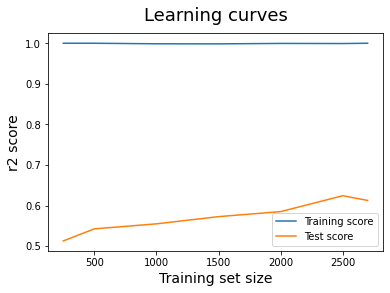

In [ ]:
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend();

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.1],
    "min_samples_split": np.linspace(0.1, 0.5),
    "min_samples_leaf": np.linspace(0.1, 0.5),
    "max_depth":[0.1,1],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.1 ,0.5],
    "n_estimators":[10]
    }

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1,subsample=0.1, random_state=0).fit(X_train_scaled, y_train)





clf_results= cross_validate(clf, X_train_scaled, y_train, scoring = ["precision","accuracy","f1","recall","roc_auc"], cv=5)



clf_results

{'fit_time': array([0.41036415, 0.42039299, 0.41613817, 0.43954396, 0.40951991]),
 'score_time': array([0.01405859, 0.01321125, 0.01294827, 0.01613951, 0.01252198]),
 'test_accuracy': array([0.55627426, 0.57309185, 0.5614489 , 0.57050453, 0.58085382]),
 'test_f1': array([0.55969191, 0.59558824, 0.57677903, 0.58910891, 0.57255937]),
 'test_precision': array([0.56185567, 0.57176471, 0.56341463, 0.57074341, 0.59128065]),
 'test_recall': array([0.55754476, 0.62148338, 0.59079284, 0.60869565, 0.55498721]),
 'test_roc_auc': array([0.57314444, 0.5969825 , 0.582444  , 0.58064635, 0.60677749])}

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1,subsample=0.1, random_state=0).fit(X_train_scaled, y_train)



clf.fit(X_train_escaled,y_train)

NameError: ignored

In [ ]:
import pickle 

Pkl_Filename = "Model_forest.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(LR_Model, file)

NameError: ignored

In [ ]:
print(clf_results['test_precision'].mean())
print(clf_results['test_recall'].mean())
print(clf_results['test_accuracy'].mean())

0.571811813871704
0.5867007672634272
0.5684346701164295


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(estimator = GradientBoostingClassifier(n_estimators=100, 
                                                                                              learning_rate=0.1 , max_depth=1, random_state=0).fit(X_train, y_train),
                                                                                              X = X_train_scaled, 
                                                                                              y = y_train, 
                                                                                              train_sizes = [100,200,300,450,650,1000,2784], cv = 5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

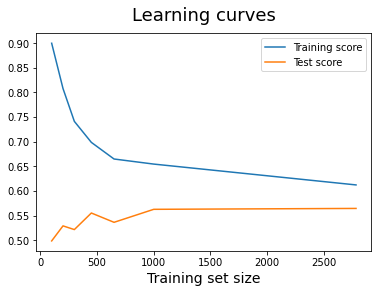

In [ ]:
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend();